https://www.datacamp.com/community/tutorials/xgboost-in-python

In [2]:
from sklearn.datasets import load_boston 

boston = load_boston()

In [3]:
keys = boston.keys()
print("{}".format(keys))

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print("data {}\n{}".format(boston.data.shape, boston.feature_names))

data (506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
import pandas as pd
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [6]:
print("{} {}".format(data.shape, data.head()))

(506, 13)       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [7]:
data['PRICE'] = boston.target

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
feature_means = data.mean(axis=0)
feature_std = data.std(axis=0)

In [10]:
feature_means.shape[0]

14

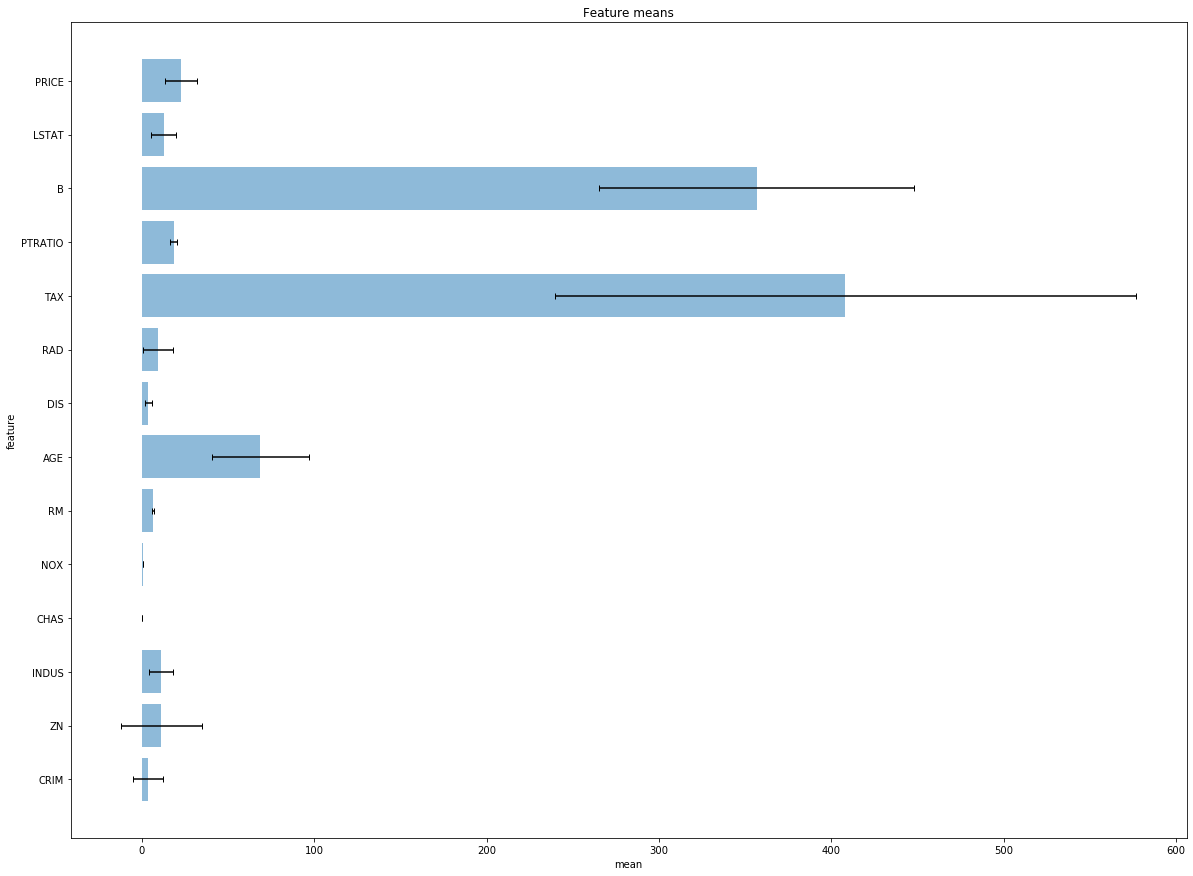

In [11]:
import matplotlib.pyplot as plt
import numpy as np

y_pos = np.arange(feature_means.shape[0])
fig, ax = plt.subplots(figsize=(20,15))
ax.barh(y_pos, feature_means, align='center', alpha=0.5, xerr=feature_std, capsize=3)
ax.set_title("Feature means")
ax.set_ylabel("feature")
ax.set_xlabel("mean")
ax.set_yticks(y_pos)
_ = ax.set_yticklabels(data.columns)

In [12]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np 



In [14]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [15]:
print("data {} {}".format(X.shape, y.shape))

data (506, 13) (506,)


In [16]:
data_matrix = xgb.DMatrix(data=X, label=y)

In [17]:
data_matrix


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print("train {} {}, test {} {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

train (404, 13) (404,), test (102, 13) (102,)


In [19]:
xg_reg = xgb.XGBRegressor(objective='reg:linear', colssample_bytree=0.3, learning_rate=0.1,
                         max_depth=5, alpha=10, n_estimators=100)

In [20]:
xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test)

[02:05:34] WARNING: /opt/conda/conda-bld/xgboost_1560800456086/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [21]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE {}".format(rmse))

RMSE 3.7673028629074654


In [22]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_matrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,
                    metrics="rmse", as_pandas=True, seed=123)
cv_results.head()

[02:05:35] WARNING: /opt/conda/conda-bld/xgboost_1560800456086/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:05:35] WARNING: /opt/conda/conda-bld/xgboost_1560800456086/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:05:35] WARNING: /opt/conda/conda-bld/xgboost_1560800456086/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.654679,0.033231,21.671270,0.060739
1,19.749899,0.043432,19.775093,0.030386
2,18.041172,0.035789,18.141612,0.038490
3,16.439292,0.071154,16.558765,0.049051
4,15.062127,0.102330,15.247309,0.089738


In [23]:
import graphviz

<Figure size 3600x3600 with 0 Axes>

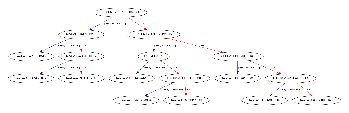

In [28]:
plt.figure(figsize=(50,50))
xgb.plot_tree(xg_reg, num_trees=0)
plt.show()

<Figure size 1440x1440 with 0 Axes>

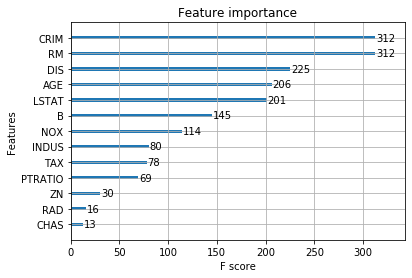

In [25]:
plt.figure(figsize=(20,20))
xgb.plot_importance(xg_reg)
plt.show()